In [183]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [184]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,fbeta_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [185]:
dataset=pd.read_csv('Features.csv',names=['person','time','xAxis','yAxis','zAxis','magnitude'])


In [186]:
user_list=['user1','user2','user3','user4','user5']

In [187]:
X=dataset.iloc[:,1:].values
y=dataset.iloc[:,0].values


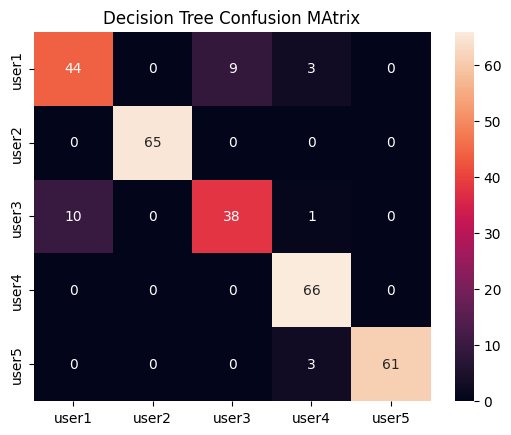

Precision:   [0.81481481 1.         0.80851064 0.90410959 1.        ]
Recall:      [0.78571429 1.         0.7755102  1.         0.953125  ]
F1 Score:    [0.8        1.         0.79166667 0.94964029 0.976     ]
Support:     [56 65 49 66 64]
F2 Score:    0.9127855704972548
Cross val score: [0.65333333 0.60333333 0.66333333 0.62666667 0.47666667]


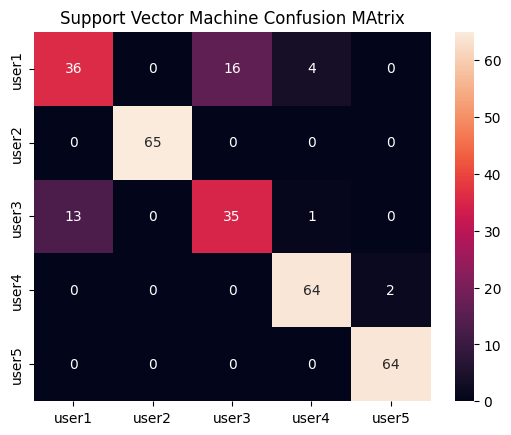

Precision:   [0.73469388 1.         0.68627451 0.92753623 0.96969697]
Recall:      [0.64285714 1.         0.71428571 0.96969697 1.        ]
F1 Score:    [0.68571429 1.         0.7        0.94814815 0.98461538]
Support:     [56 65 49 66 64]
F2 Score:    0.8788852800294448
Cross val score: [0.71333333 0.87       0.89666667 0.89333333 0.72666667]


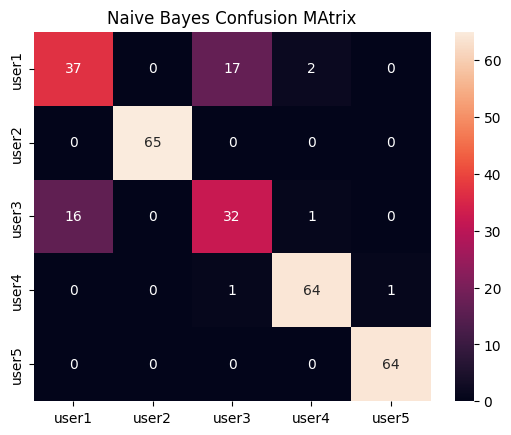

Precision:   [0.69811321 1.         0.64       0.95522388 0.98461538]
Recall:      [0.66071429 1.         0.65306122 0.96969697 1.        ]
F1 Score:    [0.67889908 1.         0.64646465 0.96240602 0.99224806]
Support:     [56 65 49 66 64]
F2 Score:    0.8729263676649562
Cross val score: [0.71333333 0.86333333 0.86       0.87       0.73333333]


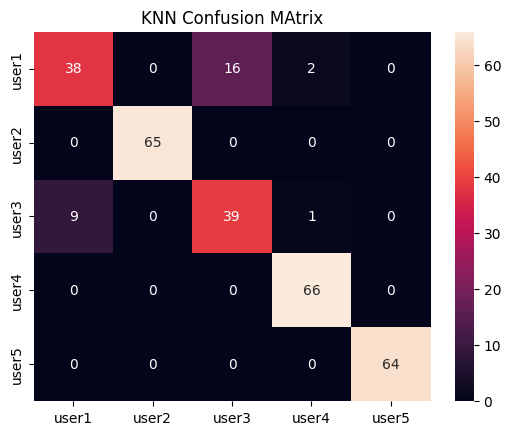

Precision:   [0.80851064 1.         0.70909091 0.95652174 1.        ]
Recall:      [0.67857143 1.         0.79591837 1.         1.        ]
F1 Score:    [0.73786408 1.         0.75       0.97777778 1.        ]
Support:     [56 65 49 66 64]
F2 Score:    0.9057837570299898
Cross val score: [0.75       0.78666667 0.78       0.76333333 0.77333333]


In [188]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'Decision Tree':DecisionTreeClassifier(),
    'Support Vector Machine':SVC(),
    'Naive Bayes':GaussianNB(),
    'KNN':KNeighborsClassifier(n_neighbors=5)
}
model_names=models.keys()
f2_score=[]
kscore=[]
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)
    scores=cross_val_score(model,X,y,cv=5)
    kscore.append(scores.mean())


    sns.heatmap(cm,annot=True,xticklabels=user_list,yticklabels=user_list)
    plt.title(name+' Confusion MAtrix')
    plt.show()

    print(f'{"Precision:": <12} {precision}')
    print(f'{"Recall:": <12} {recall}')
    print(f'{"F1 Score:": <12} {f1_score}')
    print(f'{"Support:": <12} {support}')
    print(f'{"F2 Score:": <12} {f2}')
    print(f'{"Cross val score:": <12} {scores}')

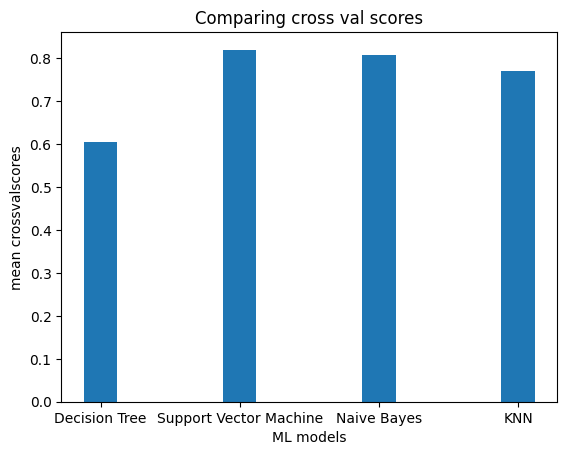

In [189]:
plt.bar(model_names,kscore,width=0.24)
plt.title('Comparing cross val scores')
plt.xlabel('ML models')
plt.ylabel('mean crossvalscores')
plt.show()

#### SVM has the best performance among these algorithms